In [1]:
import pandas as pd
import numpy as np
import pprint
import pickle

from preprocess import Preprocessing
from custom_functions import *

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_curve, plot_roc_curve

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

data_folder = "../MIDAS Category Prediction/dataset/"
model_folder = "../MIDAS Category Prediction/models/"
log_folder = "../MIDAS Category Prediction/performance logs/"
plot_folder = "../MIDAS Category Prediction/visualization plots/"

C:\Users\Amey\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Overview

In [2]:
data = pd.read_csv(data_folder + "processed_flipkart_customer_review.csv")
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,category1,category2,category3,category4,category5,category6,category7,category8,description_cleaned,description_normalized
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"['Clothing', ""Women's Clothing"", 'Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,NaN,NaN,key features of alisha solid women's cycling s...,radiant may ribbon nippl white old diamond kin...
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"['Furniture', 'Living Room Furniture', 'Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,NaN,NaN,NaN,NaN,fab. home. decor fabric double sofa bed. pric...,radiant may ribbon nippl white old diamond kin...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"['Footwear', ""Women's Footwear"", 'Ballerinas',...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,Footwear,Women's Footwear,Ballerinas,AW Bellies,NaN,NaN,NaN,NaN,key features of aw bellies sandals wedges heel...,radiant may ribbon nippl white old diamond kin...
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"['Clothing', ""Women's Clothing"", 'Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,NaN,NaN,key features of alisha solid women's cycling s...,radiant may ribbon nippl white old diamond kin...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"['Pet Supplies', 'Grooming', 'Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,Sicons All Purpose Arnica Dog Shampoo (500 ml),NaN,NaN,NaN,specifications of sicons all purpose arnica do...,radiant may ribbon nippl white old diamond kin...


## Class-Distribution of all product categories


Records Selected:  ['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining', 'Computers', 'Watches', 'Baby Care', 'Tools & Hardware', 'Toys & School Supplies', 'Pens & Stationery', 'Bags, Wallets & Belts']

Records Removed:  1057


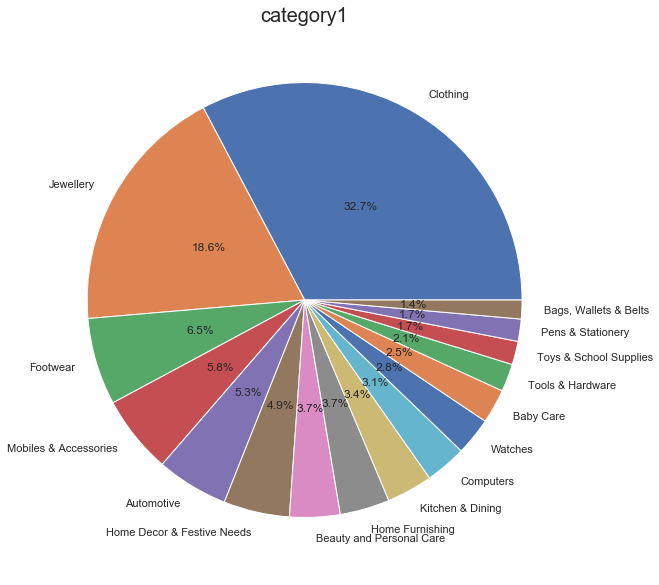


Records Selected:  ["Women's Clothing", "Men's Clothing", 'Necklaces & Chains', 'Accessories & Spare parts', 'Tablet Accessories', "Women's Footwear", 'Rings', 'Bangles, Bracelets & Armlets', 'Wrist Watches', "Kids' Clothing", 'Tools', 'Fragrances', 'Laptop Accessories', "Men's Footwear", 'NaN', 'Mobile Accessories', 'Showpieces', 'Coffee Mugs', 'School Supplies', 'Wall Decor & Clocks', 'Bed Linen', 'Baby & Kids Gifts', 'Network Components']

Records Removed:  3789


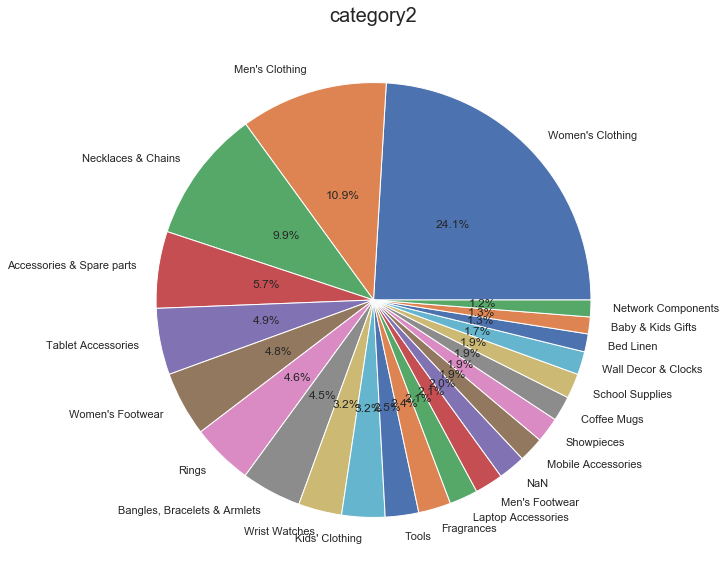


Records Selected:  ['Western Wear', 'Necklaces', 'NaN', 'Lingerie, Sleep & Swimwear', 'T-Shirts', 'Cases & Covers', 'Car Interior & Exterior', 'Ethnic Wear', 'Casual Shoes', 'Bangles', 'Deodorants', 'Gardening Tools', 'Girls Wear', 'Bracelets', 'Shirts', 'Winter & Seasonal Wear', 'Geometry & Pencil Boxes', 'Wedges']

Records Removed:  7817


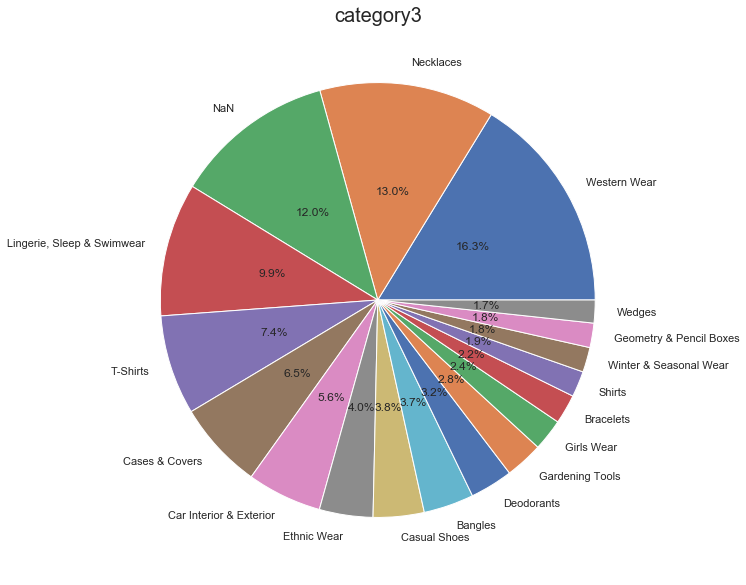


Records Selected:  ['NaN', 'Shirts, Tops & Tunics', 'Bras', 'Car Interior', 'Dresses & Skirts', 'Combos', 'Plant Containers & Sets', 'TheLostPuppy Cases & Covers', 'Leggings & Jeggings', 'Kurtas & Kurtis']

Records Removed:  9212


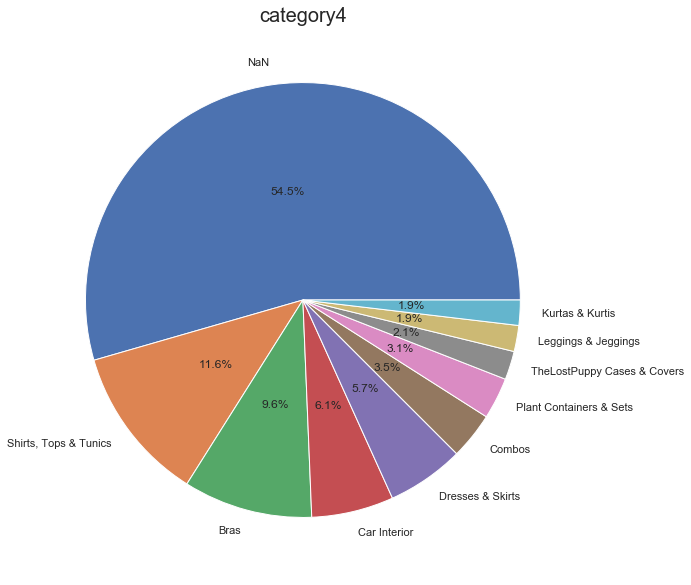


Records Selected:  ['NaN', 'Shirts', 'Car Mats', 'Dresses', 'Tops', 'Plant Container Sets']

Records Removed:  6772


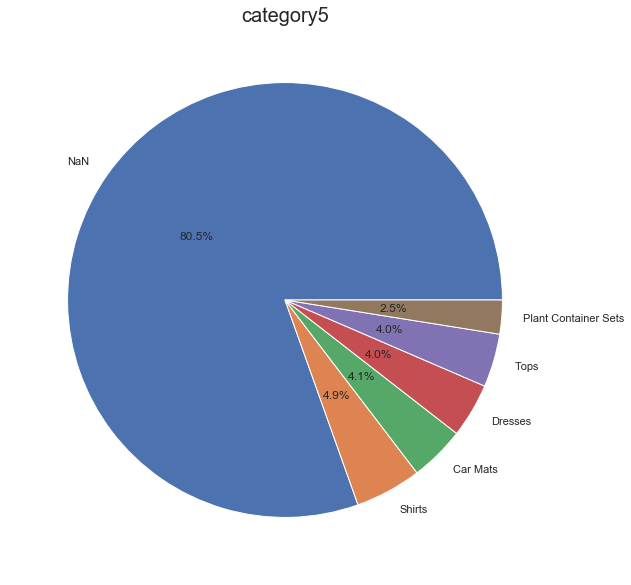


Records Selected:  ['NaN']

Records Removed:  4448


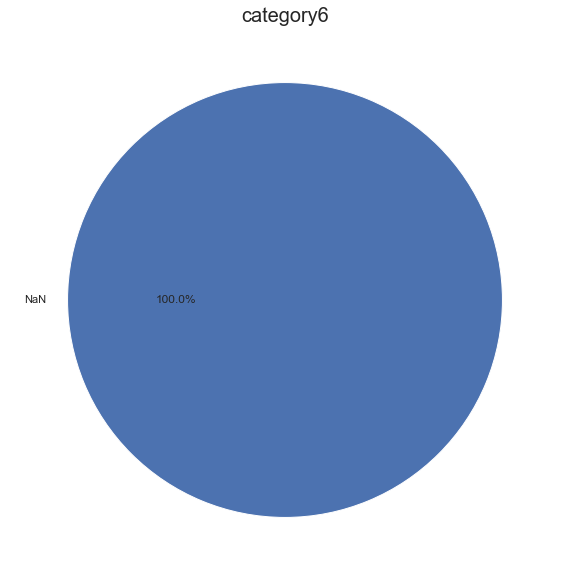


Records Selected:  ['NaN']

Records Removed:  808


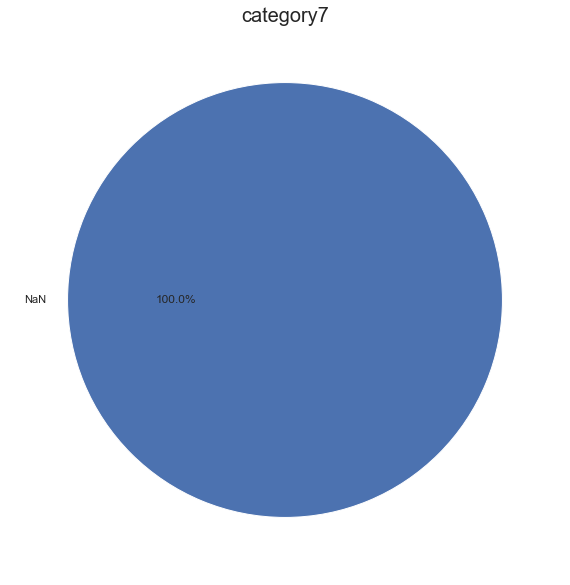


Records Selected:  ['NaN']

Records Removed:  30


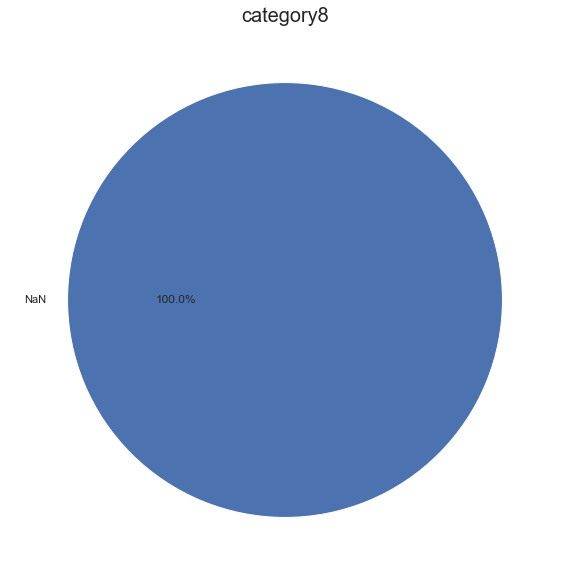

In [3]:
for i in range(1,9,1):
    category_name = "category" + str(i)
    temp = get_frequent_classes(data.fillna("NaN"), column_name = category_name, min_percent = 1)
    labels = temp[category_name].fillna("NaN").value_counts().keys()
    values = temp[category_name].fillna("NaN").value_counts()
    
    pie, ax = plt.subplots(figsize=[10,10])
    plt.pie(x = values, autopct="%.1f%%", labels = labels, pctdistance=0.5)
    plt.title(category_name, fontsize=20)
    plt.savefig(plot_folder + category_name)
    plt.show()

## Overview of primary category

In [4]:
category_name = "category1"
text_label = "description"

data = get_frequent_classes(data, column_name = category_name, min_percent = 0.5)
data = data[data[text_label].notna()]
data.dropna()
data[category_name].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle = 'Num Records', 
                                                                    xTitle = 'Product Category', 
                                                                    title='Class Distribution for primary product category')


Records Selected:  ['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining', 'Computers', 'Watches', 'Baby Care', 'Tools & Hardware', 'Toys & School Supplies', 'Pens & Stationery', 'Bags, Wallets & Belts', 'Furniture', 'Sports & Fitness']

Records Removed:  711


# Data Processing

In [5]:
text_label = "description"
class_label = "category1"

## Eliminating less frequent classes (Threshold: 0.5 %)

In [6]:
data = get_frequent_classes(data, column_name = class_label, min_percent = 0.5)
data = data[data[text_label].notna()]
data.dropna()
data.head()


Records Selected:  ['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining', 'Computers', 'Watches', 'Baby Care', 'Tools & Hardware', 'Toys & School Supplies', 'Pens & Stationery', 'Bags, Wallets & Belts', 'Furniture', 'Sports & Fitness']

Records Removed:  0


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,category1,category2,category3,category4,category5,category6,category7,category8,description_cleaned,description_normalized
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"['Clothing', ""Women's Clothing"", 'Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,NaN,NaN,key features of alisha solid women's cycling s...,radiant may ribbon nippl white old diamond kin...
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"['Furniture', 'Living Room Furniture', 'Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,NaN,NaN,NaN,NaN,fab. home. decor fabric double sofa bed. pric...,radiant may ribbon nippl white old diamond kin...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"['Footwear', ""Women's Footwear"", 'Ballerinas',...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,Footwear,Women's Footwear,Ballerinas,AW Bellies,NaN,NaN,NaN,NaN,key features of aw bellies sandals wedges heel...,radiant may ribbon nippl white old diamond kin...
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"['Clothing', ""Women's Clothing"", 'Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,NaN,NaN,key features of alisha solid women's cycling s...,radiant may ribbon nippl white old diamond kin...
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"['Clothing', ""Women's Clothing"", 'Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,...,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,NaN,NaN,key features of alisha solid women's cycling s...,radiant may ribbon nippl white old diamond kin...


## Data Cleaning

Steps:


In [7]:
pp = Preprocessing()

sample_text = data.sample()[text_label].values.tolist()[0]
data[text_label] = data[text_label].apply(lambda x : pp.clean_text(x))

print("\nBefore Cleaning: ", sample_text)
print("\nAfter Cleaning: ", pp.clean_text(sample_text))


Before Cleaning:  Buy VGreen Plant Container Set for Rs.339 online. VGreen Plant Container Set at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

After Cleaning:  buy vgreen plant container set for rs. 339 online. vgreen plant container set at best prices with free shipping & cash on delivery. only genuine products. 30 day replacement guarantee.


## Data Normalization

In [8]:
sample_text = data.sample()[text_label].values.tolist()[0]
data[text_label].apply(lambda x : pp.normalize_text(x, stemming = True, remove_punct = True, remove_stopwords = True))
    
print("\nBefore Normalization: ", sample_text)
print("\nAfter Normalization: ", pp.normalize_text(sample_text, stemming = True,
                                                   remove_punct = True, remove_stopwords = True))


Before Normalization:  key features of singh xpress combo of 2 naughty angry bird in catapult - key chains - car and bike - fancy - accessories rubber - valentines special carabiner excellent gift,singh xpress combo of 2 naughty angry bird in catapult - key chains - car and bike - fancy - accessories rubber - valentines special carabiner.  price: rs. 193 excellent product for personal use or for gifting. use it for your car keys or gift it to someone special. a must for every car enthusiast.#beautiful high quality finish #jaguar 3d metallic shing car bike logo key ring chain keychain silver color,specifications of singh xpress combo of 2 naughty angry bird in catapult - key chains - car and bike - fancy - accessories rubber - valentines special carabiner.  general locking no type carabiner material rubber in the box number of contents in sales package pack of 2 sales package 2 carabiners

After Normalization:  key featur singh press combo naughti angri bird catapult key chain car bike

# Data Preparation

In [9]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(data[text_label].values.tolist(), 
                                                                  data[class_label].values.tolist(),
                                                                  test_size = 0.2, random_state = 42, 
                                                                  stratify=data[class_label].values.tolist())

print("\nx_train: {}, x_val: {}".format(len(x_train), len(x_val)))

y_train, label_mapping = get_label_encoding(y_train)
y_val, _ = get_label_encoding(y_val)

print("\nLabel Mapping:\n")
pprint.pprint(label_mapping)

num_labels = len(np.unique(y_train))


x_train: 15429, x_val: 3858

Label Mapping:

{'Automotive': 0,
 'Baby Care': 1,
 'Bags, Wallets & Belts': 2,
 'Beauty and Personal Care': 3,
 'Clothing': 4,
 'Computers': 5,
 'Footwear': 6,
 'Furniture': 7,
 'Home Decor & Festive Needs': 8,
 'Home Furnishing': 9,
 'Jewellery': 10,
 'Kitchen & Dining': 11,
 'Mobiles & Accessories': 12,
 'Pens & Stationery': 13,
 'Sports & Fitness': 14,
 'Tools & Hardware': 15,
 'Toys & School Supplies': 16,
 'Watches': 17}


# Feature_Extraction

In [10]:
x_train_features = {}
x_val_features = {}

## BoW

In [11]:
vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorizer.fit(x_train + x_val)
x_train_features["bow_ngram"] = vectorizer.transform(x_train)
x_val_features["bow_ngram"] = vectorizer.transform(x_val)

vectorizer = CountVectorizer(ngram_range=(2, 2))
vectorizer.fit(x_train + x_val)
x_train_features["bow_bigram"] = vectorizer.transform(x_train)
x_val_features["bow_bigram"] = vectorizer.transform(x_val)


vectorizer = CountVectorizer(ngram_range=(3, 3))
vectorizer.fit(x_train + x_val)
x_train_features["bow_trigram"] = vectorizer.transform(x_train)
x_val_features["bow_trigram"] = vectorizer.transform(x_val)


## TF-IDF

In [12]:
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1,3))
tfidf_vectorizer.fit(x_train + x_val)
x_train_features["tfidf_ngram"] = tfidf_vectorizer.transform(x_train)
x_val_features["tfidf_ngram"] = tfidf_vectorizer.transform(x_val)

tfidf_vectorizer = TfidfVectorizer(ngram_range = (2,2))
tfidf_vectorizer.fit(x_train + x_val)
x_train_features["tfidf_bigram"] = tfidf_vectorizer.transform(x_train)
x_val_features["tfidf_bigram"] = tfidf_vectorizer.transform(x_val)

tfidf_vectorizer = TfidfVectorizer(ngram_range = (3,3))
tfidf_vectorizer.fit(x_train + x_val)
x_train_features["tfidf_trigram"] = tfidf_vectorizer.transform(x_train)
x_val_features["tfidf_trigram"] = tfidf_vectorizer.transform(x_val)

# Machine Learning models with feature combination

In [13]:
results = []

## Naive Bayes

In [14]:
nb_classifier = naive_bayes.MultinomialNB()

for feature in x_train_features:
  print("Feature:", feature)
  nb_classifier.fit(x_train_features[feature], y_train)
  predictions = nb_classifier.predict(x_val_features[feature])

  acc = accuracy_score(predictions, y_val) * 100
  metrics = classification_report(y_true = y_val, y_pred = predictions, labels = np.unique(y_val), output_dict = True)
  results.append({"Model" : "Naive Bayes Classifier",
                  "Input Feature": feature,
                  "accuracy" : acc, 
                  "macro-f1" : metrics["macro avg"]["f1-score"], 
                  "macro-precision" : metrics["macro avg"]["precision"],
                  "macro-recall" : metrics["macro avg"]["recall"],
                  "weighted-f1" : metrics["weighted avg"]["f1-score"],
                  "weighted-precision" : metrics["weighted avg"]["precision"],
                  "weighted-recall" : metrics["weighted avg"]["recall"]})
    
  cls_rep = classification_report(y_true = y_val, y_pred = predictions, labels = np.unique(y_val), 
                                  target_names = list(label_mapping.keys()))
  print("Accuracy: ", acc)
  print("\nClassification Report:\n", cls_rep) 
  print("\n---------------------------------------------------------------------\n") 
    
  save_model_as_pkl(nb_classifier, filename = model_folder + "Naive Bayes Classifier" + "-" + feature)

Feature: bow_ngram
Accuracy:  90.04665629860031

Classification Report:
                             precision    recall  f1-score   support

                Automotive       0.83      0.94      0.88       215
                 Baby Care       0.97      0.58      0.72       111
     Bags, Wallets & Belts       0.81      0.53      0.64        49
  Beauty and Personal Care       0.99      0.87      0.93       137
                  Clothing       0.97      1.00      0.98      1266
                 Computers       0.89      0.59      0.71        99
                  Footwear       0.98      0.75      0.85       230
                 Furniture       0.97      0.83      0.90        36
Home Decor & Festive Needs       0.84      0.99      0.91       182
           Home Furnishing       0.91      0.98      0.95       120
                 Jewellery       0.75      1.00      0.86       698
          Kitchen & Dining       0.96      0.77      0.86       135
     Mobiles & Accessories       0.97     

Feature: tfidf_trigram
Accuracy:  79.57490927941939

Classification Report:
                             precision    recall  f1-score   support

                Automotive       0.99      0.84      0.91       215
                 Baby Care       1.00      0.46      0.63       111
     Bags, Wallets & Belts       1.00      0.27      0.42        49
  Beauty and Personal Care       1.00      0.50      0.67       137
                  Clothing       0.76      1.00      0.86      1266
                 Computers       1.00      0.26      0.42        99
                  Footwear       1.00      0.51      0.68       230
                 Furniture       0.92      0.33      0.49        36
Home Decor & Festive Needs       0.98      0.65      0.79       182
           Home Furnishing       0.97      0.78      0.87       120
                 Jewellery       0.64      0.98      0.78       698
          Kitchen & Dining       1.00      0.56      0.72       135
     Mobiles & Accessories       0.98 

## SVM

In [15]:
svm_classifier = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

for feature in x_train_features:
  print("Feature:", feature)
  svm_classifier.fit(x_train_features[feature], y_train)
  predictions = svm_classifier.predict(x_val_features[feature])

  acc = accuracy_score(predictions, y_val) * 100
  metrics = classification_report(y_true = y_val, y_pred = predictions, labels = np.unique(y_val), output_dict = True)
  results.append({"Model" : "SVM Classifier",
                  "Input Feature": feature,
                  "accuracy" : acc, 
                  "macro-f1" : metrics["macro avg"]["f1-score"], 
                  "macro-precision" : metrics["macro avg"]["precision"],
                  "macro-recall" : metrics["macro avg"]["recall"],
                  "weighted-f1" : metrics["weighted avg"]["f1-score"],
                  "weighted-precision" : metrics["weighted avg"]["precision"],
                  "weighted-recall" : metrics["weighted avg"]["recall"]})
    
  cls_rep = classification_report(y_true = y_val, y_pred = predictions, labels = np.unique(y_val), 
                                  target_names = list(label_mapping.keys()))
  print("Accuracy: ", acc)
  print("\nClassification Report:\n", cls_rep) 
  print("\n---------------------------------------------------------------------\n")
    
  save_model_as_pkl(nb_classifier, filename = model_folder + "SVM Classifier" + "-" + feature)

Feature: bow_ngram
Accuracy:  97.04510108864697

Classification Report:
                             precision    recall  f1-score   support

                Automotive       0.97      0.97      0.97       215
                 Baby Care       0.97      0.85      0.90       111
     Bags, Wallets & Belts       0.92      0.96      0.94        49
  Beauty and Personal Care       0.97      0.97      0.97       137
                  Clothing       0.98      1.00      0.99      1266
                 Computers       0.90      0.89      0.89        99
                  Footwear       1.00      0.97      0.98       230
                 Furniture       1.00      0.92      0.96        36
Home Decor & Festive Needs       0.93      0.98      0.96       182
           Home Furnishing       0.97      0.97      0.97       120
                 Jewellery       0.99      1.00      1.00       698
          Kitchen & Dining       0.93      0.92      0.93       135
     Mobiles & Accessories       0.96     

Feature: tfidf_trigram
Accuracy:  92.63867288750647

Classification Report:
                             precision    recall  f1-score   support

                Automotive       1.00      0.94      0.97       215
                 Baby Care       0.98      0.71      0.82       111
     Bags, Wallets & Belts       0.98      0.82      0.89        49
  Beauty and Personal Care       1.00      0.86      0.93       137
                  Clothing       0.85      1.00      0.92      1266
                 Computers       1.00      0.71      0.83        99
                  Footwear       0.91      0.93      0.92       230
                 Furniture       0.97      0.89      0.93        36
Home Decor & Festive Needs       0.89      0.95      0.92       182
           Home Furnishing       0.95      0.88      0.91       120
                 Jewellery       1.00      0.98      0.99       698
          Kitchen & Dining       0.98      0.79      0.88       135
     Mobiles & Accessories       0.98 

## Linear Support Vector Classifier

In [16]:
lsvc_classifier = svm.LinearSVC()

for feature in x_train_features:
  print("Feature:", feature)
  lsvc_classifier.fit(x_train_features[feature], y_train)
  predictions = lsvc_classifier.predict(x_val_features[feature])

  acc = accuracy_score(predictions, y_val) * 100
  metrics = classification_report(y_true = y_val, y_pred = predictions, labels = np.unique(y_val), output_dict = True)
  results.append({"Model" : "Linear SVC",
                  "Input Feature": feature,
                  "accuracy" : acc, 
                  "macro-f1" : metrics["macro avg"]["f1-score"], 
                  "macro-precision" : metrics["macro avg"]["precision"],
                  "macro-recall" : metrics["macro avg"]["recall"],
                  "weighted-f1" : metrics["weighted avg"]["f1-score"],
                  "weighted-precision" : metrics["weighted avg"]["precision"],
                  "weighted-recall" : metrics["weighted avg"]["recall"]})
    
  cls_rep = classification_report(y_true = y_val, y_pred = predictions, labels = np.unique(y_val), 
                                  target_names = list(label_mapping.keys()))
  print("Accuracy: ", acc)
  print("\nClassification Report:\n", cls_rep) 
  print("\n---------------------------------------------------------------------\n")

  save_model_as_pkl(nb_classifier, filename = model_folder + "Linear SVC" + "-" + feature)

Feature: bow_ngram
Accuracy:  97.74494556765163

Classification Report:
                             precision    recall  f1-score   support

                Automotive       0.97      0.97      0.97       215
                 Baby Care       0.96      0.88      0.92       111
     Bags, Wallets & Belts       0.92      0.98      0.95        49
  Beauty and Personal Care       0.97      0.97      0.97       137
                  Clothing       0.99      1.00      0.99      1266
                 Computers       0.91      0.93      0.92        99
                  Footwear       1.00      0.98      0.99       230
                 Furniture       1.00      0.94      0.97        36
Home Decor & Festive Needs       0.93      0.98      0.96       182
           Home Furnishing       0.97      0.97      0.97       120
                 Jewellery       1.00      1.00      1.00       698
          Kitchen & Dining       0.96      0.96      0.96       135
     Mobiles & Accessories       0.96     

Feature: tfidf_trigram
Accuracy:  94.68636599274235

Classification Report:
                             precision    recall  f1-score   support

                Automotive       1.00      0.96      0.98       215
                 Baby Care       0.98      0.74      0.84       111
     Bags, Wallets & Belts       0.95      0.86      0.90        49
  Beauty and Personal Care       1.00      0.92      0.96       137
                  Clothing       0.90      1.00      0.95      1266
                 Computers       1.00      0.77      0.87        99
                  Footwear       0.95      0.93      0.94       230
                 Furniture       0.97      0.92      0.94        36
Home Decor & Festive Needs       0.91      0.96      0.93       182
           Home Furnishing       0.97      0.93      0.95       120
                 Jewellery       0.99      0.99      0.99       698
          Kitchen & Dining       0.96      0.85      0.90       135
     Mobiles & Accessories       0.98 

## Random Forest

In [17]:
rf_classifier = RandomForestClassifier(random_state=0)

for feature in x_train_features:
  print("Feature:", feature)
  rf_classifier.fit(x_train_features[feature], y_train)
  predictions = rf_classifier.predict(x_val_features[feature])

  acc = accuracy_score(predictions, y_val) * 100
  metrics = classification_report(y_true = y_val, y_pred = predictions, labels = np.unique(y_val), output_dict = True)
  results.append({"Model" : "Random Forest Classifier",
                  "Input Feature": feature,
                  "accuracy" : acc, 
                  "macro-f1" : metrics["macro avg"]["f1-score"], 
                  "macro-precision" : metrics["macro avg"]["precision"],
                  "macro-recall" : metrics["macro avg"]["recall"],
                  "weighted-f1" : metrics["weighted avg"]["f1-score"],
                  "weighted-precision" : metrics["weighted avg"]["precision"],
                  "weighted-recall" : metrics["weighted avg"]["recall"]})
    
  cls_rep = classification_report(y_true = y_val, y_pred = predictions, labels = np.unique(y_val), 
                                  target_names = list(label_mapping.keys()))
  print("Accuracy: ", acc)
  print("\nClassification Report:\n", cls_rep) 
  print("\n---------------------------------------------------------------------\n")

  save_model_as_pkl(nb_classifier, filename = model_folder + "Random Forest Classifier" + "-" + feature)

Feature: bow_ngram
Accuracy:  96.39709694142043

Classification Report:
                             precision    recall  f1-score   support

                Automotive       0.98      0.97      0.97       215
                 Baby Care       0.99      0.69      0.81       111
     Bags, Wallets & Belts       0.92      0.90      0.91        49
  Beauty and Personal Care       0.99      0.95      0.97       137
                  Clothing       0.95      1.00      0.97      1266
                 Computers       0.99      0.84      0.91        99
                  Footwear       0.99      0.97      0.98       230
                 Furniture       0.97      0.92      0.94        36
Home Decor & Festive Needs       0.94      0.97      0.96       182
           Home Furnishing       0.97      0.93      0.95       120
                 Jewellery       1.00      1.00      1.00       698
          Kitchen & Dining       0.92      0.92      0.92       135
     Mobiles & Accessories       0.96     

Feature: tfidf_trigram
Accuracy:  94.66044582685329

Classification Report:
                             precision    recall  f1-score   support

                Automotive       0.99      0.97      0.98       215
                 Baby Care       0.99      0.68      0.80       111
     Bags, Wallets & Belts       0.93      0.88      0.91        49
  Beauty and Personal Care       1.00      0.93      0.97       137
                  Clothing       0.93      1.00      0.96      1266
                 Computers       0.98      0.81      0.88        99
                  Footwear       0.99      0.86      0.92       230
                 Furniture       0.97      0.94      0.96        36
Home Decor & Festive Needs       0.87      0.96      0.91       182
           Home Furnishing       0.88      0.93      0.90       120
                 Jewellery       0.95      1.00      0.97       698
          Kitchen & Dining       0.95      0.85      0.90       135
     Mobiles & Accessories       0.97 

## K- Nearest Neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=1)

for feature in x_train_features:
  print("Feature:", feature)
  KNN_classifier.fit(x_train_features[feature], y_train)
  predictions = KNN_classifier.predict(x_val_features[feature])

  acc = accuracy_score(predictions, y_val) * 100
  metrics = classification_report(y_true = y_val, y_pred = predictions, labels = np.unique(y_val), output_dict = True)
  results.append({"Model" : "KNN Classifier",
                  "Input Feature": feature,
                  "accuracy" : acc, 
                  "macro-f1" : metrics["macro avg"]["f1-score"], 
                  "macro-precision" : metrics["macro avg"]["precision"],
                  "macro-recall" : metrics["macro avg"]["recall"],
                  "weighted-f1" : metrics["weighted avg"]["f1-score"],
                  "weighted-precision" : metrics["weighted avg"]["precision"],
                  "weighted-recall" : metrics["weighted avg"]["recall"]})
    
  cls_rep = classification_report(y_true = y_val, y_pred = predictions, labels = np.unique(y_val), 
                                  target_names = list(label_mapping.keys()))
  print("Accuracy: ", acc)
  print("\nClassification Report:\n", cls_rep) 
  print("\n---------------------------------------------------------------------\n")
    
  save_model_as_pkl(nb_classifier, filename = model_folder + "KNN Classifier" + "-" + feature)

Feature: bow_ngram
Accuracy:  92.2239502332815

Classification Report:
                             precision    recall  f1-score   support

                Automotive       0.98      0.95      0.96       215
                 Baby Care       0.66      0.81      0.73       111
     Bags, Wallets & Belts       0.89      0.86      0.88        49
  Beauty and Personal Care       0.95      0.92      0.93       137
                  Clothing       0.91      0.99      0.95      1266
                 Computers       0.66      0.84      0.74        99
                  Footwear       0.99      0.84      0.91       230
                 Furniture       1.00      0.89      0.94        36
Home Decor & Festive Needs       0.99      0.86      0.92       182
           Home Furnishing       0.98      0.89      0.93       120
                 Jewellery       1.00      0.93      0.96       698
          Kitchen & Dining       0.91      0.85      0.88       135
     Mobiles & Accessories       0.99      

Feature: tfidf_trigram
Accuracy:  95.28252980819077

Classification Report:
                             precision    recall  f1-score   support

                Automotive       0.98      0.96      0.97       215
                 Baby Care       0.90      0.84      0.87       111
     Bags, Wallets & Belts       0.83      0.78      0.80        49
  Beauty and Personal Care       0.91      0.97      0.94       137
                  Clothing       0.98      0.99      0.99      1266
                 Computers       0.80      0.83      0.82        99
                  Footwear       0.93      0.88      0.91       230
                 Furniture       0.97      0.89      0.93        36
Home Decor & Festive Needs       0.93      0.97      0.95       182
           Home Furnishing       0.95      0.96      0.95       120
                 Jewellery       0.97      0.98      0.98       698
          Kitchen & Dining       0.97      0.89      0.93       135
     Mobiles & Accessories       0.93 

# Store Results

In [19]:
results_df = pd.DataFrame(results)
results_df.to_csv(log_folder + category_name + "results.csv", index = False)